In [45]:
import pandas as pd
import numpy as np
import timeit

import seaborn as sns


In [38]:

file = "winequality-red.csv"
headers = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar","chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
df = pd.read_csv(file, names=headers, sep=';')
df = df.dropna(axis=0)
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
df.dropna(subset=['quality'], inplace=True)
print(df)

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
1              7.4              0.7           0            1.9     0.076   
2              7.8             0.88           0            2.6     0.098   
3              7.8             0.76        0.04            2.3     0.092   
4             11.2             0.28        0.56            1.9     0.075   
5              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
1595           6.2              0.6        0.08              2      0.09   
1596           5.9             0.55         0.1            2.2     0.062   
1597           6.3             0.51        0.13            2.3     0.076   
1598           5.9            0.645        0.12              2     0.075   
1599             6             0.31        0.47            3.6     0.067   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
1            

In [39]:
def normalize_data(data):
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return normalized_data


def standardize_data(data):
    standardized_data = (data - np.mean(data)) / np.std(data)
    return standardized_data

df['quality'] = normalize_data(df['quality'])
df['quality'] = standardize_data(df['quality'])
print(df)

     fixed acidity volatile acidity citric acid residual sugar chlorides  \
1              7.4              0.7           0            1.9     0.076   
2              7.8             0.88           0            2.6     0.098   
3              7.8             0.76        0.04            2.3     0.092   
4             11.2             0.28        0.56            1.9     0.075   
5              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
1595           6.2              0.6        0.08              2      0.09   
1596           5.9             0.55         0.1            2.2     0.062   
1597           6.3             0.51        0.13            2.3     0.076   
1598           5.9            0.645        0.12              2     0.075   
1599             6             0.31        0.47            3.6     0.067   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
1            

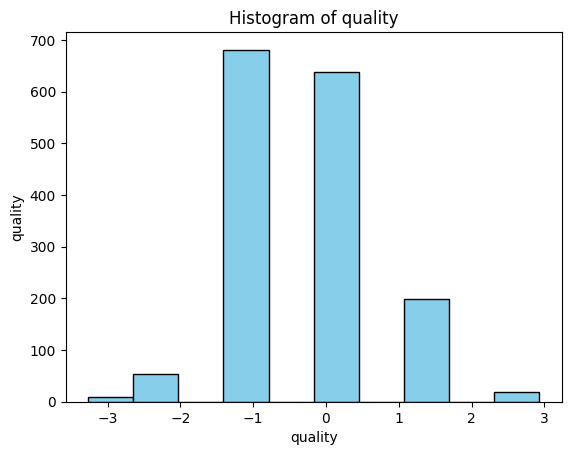

In [34]:
import matplotlib.pyplot as plt

plt.hist(df['quality'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('quality')
plt.ylabel('quality')
plt.title('Histogram of quality')
plt.show()

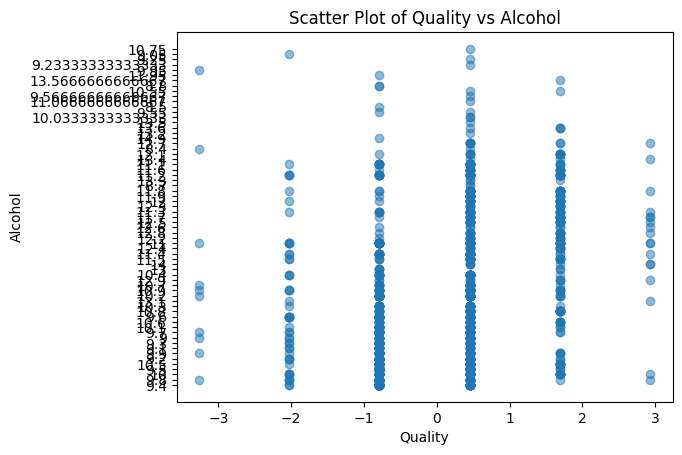

In [35]:
plt.scatter(df['quality'], df['alcohol'], alpha=0.5)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Scatter Plot of Quality vs Alcohol')
plt.show()

In [41]:
pearson_corr = df['quality'].corr(df['alcohol'], method='pearson')

spearman_corr = df['quality'].corr(df['alcohol'], method='spearman')

In [43]:
encoded_data = pd.get_dummies(df, columns=['fixed acidity'])

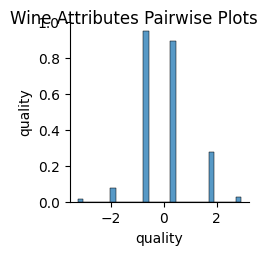

In [50]:
cols = ['volatile acidity', 'residual sugar']
pp = sns.pairplot(df)

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots')